# 데이터 준비

- 이 노트북은 아래의 테이블에서 필요한 것을 선별하여 조인을 하여 하나의 데이터세트를 생성 합니다.
    - Order
    - Custom
    - Order Item
    - Product
    - Product Category
    - Seller

- 이후에 ```order_approved_at , order_delivered_customer_date```의 차이를 계산하여 배달 시간을 구합니다.   
- 시간을 생성하여, 1일,2일,3일...일별로 데이터를 생성한 후에 0일 ~ 14일까지만의 데이터를 선별 합니다.


- 레이블을 5개의 구간으로 생성 합니다.
    - 0: 0 - 2일 (00:00:00 - 2일 23:59:59)
    - 1: 2 - 5일 (3일 - 5일 23:59:59) 
    - 2: 5 - 8일 (6일 - 8일 23:59:59)     
    - 3: 8 - 11일 (9일 - 11일 23:59:59)         
    - 4: 11 - 14일 (12일 - 14일 23:59:59)             
    
- 최종적으로 필요한 컬럼만 선별하여 로컬에 저장 합니다.


In [1]:
import pandas as pd
pd.options.display.max_rows = 5
from IPython.display import display

def show_df(file_name, display_flag=True):
    df = pd.read_csv(file_name)
    if display_flag:
        display(df)
    return df
    


## Order Table 추출

In [2]:
## Extract columns in Order table
file_name = 'data/olist_orders_dataset.csv'    
df = show_df(file_name, False)    
# print(df.columns)

def filter_df(raw_df, cols):
    df = raw_df.copy()
    df = df[cols]
    return df


cols = ['order_id', 'customer_id', 'order_status','order_approved_at', 'order_delivered_customer_date']
order_df = filter_df(df, cols)
order_df = order_df[order_df['order_status'] == 'delivered']
order_df
    

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-08-07 15:27:45
...,...,...,...,...,...
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:36:21,2018-01-25 23:32:54
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-09 11:20:28,2018-03-16 13:08:30


## Customer Table 추출

In [3]:
file_name = 'data/olist_customers_dataset.csv'    
df = show_df(file_name, False)   
df.columns
cols = ['customer_id', 'customer_zip_code_prefix','customer_city', 'customer_state']
cust_df = filter_df(df, cols)
cust_df



,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
...,...,...,...,...
99439,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,6703,cotia,SP


## Order, Customer 조인

In [4]:
full_df = order_df.merge(cust_df, on='customer_id')
full_df

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-08-07 15:27:45,47813,barreiras,BA
...,...,...,...,...,...,...,...,...
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:36:21,2018-01-25 23:32:54,28685,japuiba,RJ
96477,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-09 11:20:28,2018-03-16 13:08:30,83750,lapa,PR


## Order Item

In [5]:
file_name = 'data/olist_order_items_dataset.csv'    
df = show_df(file_name, False)   
df.columns
cols = ['order_id', 'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value']

order_item_df = filter_df(df, cols)
order_item_df




,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
...,...,...,...,...,...,...
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,43.00,12.79


## Order_item 조인

In [6]:
full_df = full_df.merge(order_item_df, on='order_id')

## Product

In [7]:
file_name = 'data/olist_products_dataset.csv'    
df = show_df(file_name, False)  
df.columns
# cols = ['order_id', 'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value']
cols = ['product_id', 'product_category_name', 'product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm']
product_df = filter_df(df, cols)
product_df





,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
...,...,...,...,...,...,...
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,2083.0,12.0,2.0,7.0


## Product 조인

In [8]:
full_df = full_df.merge(product_df, on='product_id')
full_df

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 20:05:16,2017-08-18 14:44:43,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,utilidades_domesticas,500.0,19.0,8.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110195,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,12209,sao jose dos campos,SP,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,72.00,13.08,beleza_saude,1175.0,22.0,13.0,18.0
110196,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-09 11:20:28,2018-03-16 13:08:30,83750,lapa,PR,1,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,68.50,18.36,beleza_saude,150.0,16.0,7.0,15.0


## Product Category

In [9]:
file_name = 'data/product_category_name_translation.csv'    
prod_cate_df = show_df(file_name)    

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
...,...,...
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services


## Product Category 조인

In [10]:
full_df = full_df.merge(prod_cate_df, on='product_category_name')
full_df

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0,housewares
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 20:05:16,2017-08-18 14:44:43,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,utilidades_domesticas,500.0,19.0,8.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108636,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,delivered,2017-01-26 11:22:17,2017-02-14 16:24:01,76940,rolim de moura,RO,1,6c7a0a349ad11817745e3ad58abd5c79,48162d548f5b1b11b9d29d1e01f75a61,183.29,25.77,seguros_e_servicos,1225.0,27.0,35.0,15.0,security_and_services
108637,bede3503afed051733eeb4a84d1adcc5,919570a26efbd068d6a0f66d5c5072a3,delivered,2017-09-19 04:05:52,2017-09-28 18:14:35,71940,brasilia,DF,1,8db75af9aed3315374db44d7860e25da,4e922959ae960d389249c378d1c939f5,100.00,15.45,seguros_e_servicos,400.0,26.0,22.0,11.0,security_and_services


## Seller

In [11]:
file_name = 'data/olist_sellers_dataset.csv'    
seller_df = show_df(file_name)    

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
...,...,...,...,...
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


## Seller 조인

In [12]:
full_df = full_df.merge(seller_df, on='seller_id')
full_df

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,...,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 20:05:16,2017-08-18 14:44:43,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,7.78,utilidades_domesticas,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108636,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-24 10:31:25,2018-07-27 14:04:10,9951,diadema,SP,1,9c313adb4b38a55b092f53f83f78be9e,...,12.86,artes_e_artesanato,500.0,16.0,6.0,16.0,arts_and_craftmanship,17201,jau,SP
108637,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-24 10:31:25,2018-07-27 14:04:10,9951,diadema,SP,2,eacb104882d39ffb53140b1d1860a7c3,...,12.87,artes_e_artesanato,500.0,21.0,7.0,14.0,arts_and_craftmanship,17201,jau,SP


In [13]:
pd.options.display.max_rows=25
full_df.nunique()

order_id                         95127
customer_id                      95127
order_status                         1
order_approved_at                87116
order_delivered_customer_date    94331
customer_zip_code_prefix         14844
customer_city                     4073
customer_state                      27
order_item_id                       21
product_id                       31621
seller_id                         2912
price                             5790
freight_value                     6902
product_category_name               71
product_weight_g                  2168
product_length_cm                   99
product_height_cm                  102
product_width_cm                    94
product_category_name_english       71
seller_zip_code_prefix            2136
seller_city                        588
seller_state                        22
dtype: int64

In [14]:

def insert_deliver_days(raw_df):
    df = raw_df.copy()
    df = df[df.order_item_id == 1]
    df.order_approved_at = pd.to_datetime(df.order_approved_at, format = '%Y-%m-%dT%H:%M:%S')
    df.order_delivered_customer_date = pd.to_datetime(df.order_delivered_customer_date, format = '%Y-%m-%dT%H:%M:%S')    
    
    deliver_delta = df.order_delivered_customer_date - df.order_approved_at            
    # print(deliver_delta.total_seconds())
    df.insert(0,'deliver_duration', deliver_delta)
    df.insert(0,'deliver_days',df['deliver_duration'].apply(lambda x: x.days))    
    # df.drop(['deliver_duration'], axis=1, inplace=True)
    
    return df
# cols = ['order_id','order_approved_at','order_delivered_customer_date','customer_zip_code_prefix','customer_city',
#        'customer_state', 'order_item_id', 'price', 'freight_value', 'product_id','product_category_name',
#        'product_weight_g', 'product_length_cm', 'product_height_cm',
#        'product_width_cm', 'product_category_name_english',
#        'seller_zip_code_prefix','seller_city',
#        'seller_state']

final_df = insert_deliver_days(full_df)
    


In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95100 entries, 0 to 108636
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   deliver_days                   95079 non-null  float64        
 1   deliver_duration               95079 non-null  timedelta64[ns]
 2   order_id                       95100 non-null  object         
 3   customer_id                    95100 non-null  object         
 4   order_status                   95100 non-null  object         
 5   order_approved_at              95087 non-null  datetime64[ns] 
 6   order_delivered_customer_date  95092 non-null  datetime64[ns] 
 7   customer_zip_code_prefix       95100 non-null  int64          
 8   customer_city                  95100 non-null  object         
 9   customer_state                 95100 non-null  object         
 10  order_item_id                  95100 non-null  int64          
 11  p

In [16]:
pd.options.display.max_rows = 30
final_df.nunique()

deliver_days                       147
deliver_duration                 92537
order_id                         95100
customer_id                      95100
order_status                         1
order_approved_at                87092
order_delivered_customer_date    94304
customer_zip_code_prefix         14843
customer_city                     4072
customer_state                      27
order_item_id                        1
product_id                       30584
seller_id                         2899
price                             5707
freight_value                     6643
product_category_name               71
product_weight_g                  2152
product_length_cm                   99
product_height_cm                  102
product_width_cm                    94
product_category_name_english       71
seller_zip_code_prefix            2129
seller_city                        588
seller_state                        22
dtype: int64

## 레이블 생성

In [17]:
def make_label(raw_df):
    '''
    레이블 classes 생성
    '''
    df = raw_df.copy()
    df = df[df.deliver_days < 14]
    df = df[df.deliver_days >=0]    
    bins = pd.IntervalIndex.from_tuples([(-1,2),(2,5),(5,8),(8,11),(11,14)]) # (start, end) : start: non-inclusive, end: inclusive
    df.insert(0,'classes',
              pd.cut(df['deliver_days'], bins= bins,                      
                     labels=[0,1,2,3,4]))
    df['classes'] = df['classes'].cat.codes
    return df

pre_df = make_label(final_df)
pre_df

,classes,deliver_days,deliver_duration,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,customer_zip_code_prefix,customer_city,...,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,2,8.0,8 days 10:17:58,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,...,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,0,2.0,2 days 18:39:27,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 20:05:16,2017-08-18 14:44:43,3366,sao paulo,...,7.78,utilidades_domesticas,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,1,4.0,4 days 23:46:46,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:43:15,2017-08-07 18:30:01,2290,sao paulo,...,7.78,utilidades_domesticas,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
3,4,13.0,13 days 15:50:48,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-25 02:14:11,2017-11-07 18:04:59,88032,florianopolis,...,14.10,utilidades_domesticas,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
6,1,5.0,5 days 00:09:53,41c045db2d1876be9f05cf4a787693b2,a286f46d6e54cc0179bbb0ee07b0df5e,delivered,2017-08-16 14:55:20,2017-08-21 15:05:13,5640,sao paulo,...,7.78,utilidades_domesticas,600.0,16.0,6.0,20.0,housewares,9350,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108631,3,10.0,10 days 04:21:45,6f1fd45a62a1568370bee476108eaa18,326d02c121e7690a00c5254b2b2c4cac,delivered,2017-04-29 07:05:08,2017-05-09 11:26:53,86975,mandaguari,...,14.52,musica,200.0,24.0,3.0,19.0,music,1420,sao paulo,SP
108633,1,3.0,3 days 01:15:38,edcf1e1eeb52381be9388c90152be52d,ce2172509c4149d65212484eb761bc37,delivered,2018-08-21 11:50:47,2018-08-24 13:06:25,88350,brusque,...,24.83,artes_e_artesanato,1900.0,19.0,16.0,16.0,arts_and_craftmanship,95910,lajeado,RS
108634,1,4.0,4 days 23:16:15,2c12150c742ae2fa48bc703964c16c5f,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-29 18:30:31,2018-08-03 17:46:46,35930,joao monlevade,...,19.60,artes_e_artesanato,1000.0,25.0,25.0,25.0,arts_and_craftmanship,17201,jau,SP
108635,1,3.0,3 days 22:42:11,9f7ba492c273ffac8f90a623b8eadd3b,c61336d6c835632048f973d2f2db598d,delivered,2018-08-24 03:24:24,2018-08-28 02:06:35,12305,jacarei,...,12.79,artes_e_artesanato,200.0,16.0,6.0,16.0,arts_and_craftmanship,17201,jau,SP


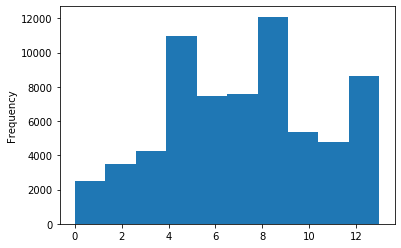

In [18]:
import matplotlib.pyplot as plt
# pre_df['deliver_days'].plot(kind='hist')
pre_df['deliver_days'].plot(kind='hist')

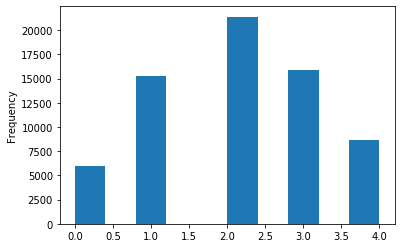

In [19]:
pre_df['classes'].plot(kind='hist')

## 컬럼 제거

In [20]:
pre_df.columns

Index(['classes', 'deliver_days', 'deliver_duration', 'order_id',
       'customer_id', 'order_status', 'order_approved_at',
       'order_delivered_customer_date', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'product_category_name',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'product_category_name_english',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [21]:
def filter_df(raw_df, cols):
    df = raw_df.copy()
    df = df[cols]
    return df


cols = ['classes','order_approved_at','customer_id', 'customer_zip_code_prefix','customer_city',
       'customer_state', 'price', 'freight_value','product_id',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'product_category_name_english',
       'seller_zip_code_prefix','seller_city',
       'seller_state']


f_df = filter_df(pre_df, cols)
f_df




,classes,order_approved_at,customer_id,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,2,2017-10-02 11:07:15,9ef432eb6251297304e76186b10a928d,3149,sao paulo,SP,29.99,8.72,87285b34884572647811a353c7ac498a,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,0,2017-08-15 20:05:16,a20e8105f23924cd00833fd87daa0831,3366,sao paulo,SP,29.99,7.78,87285b34884572647811a353c7ac498a,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,1,2017-08-02 18:43:15,26c7ac168e1433912a51b924fbd34d34,2290,sao paulo,SP,29.99,7.78,87285b34884572647811a353c7ac498a,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
3,4,2017-10-25 02:14:11,53904ddbea91e1e92b2b3f1d09a7af86,88032,florianopolis,SC,29.99,14.10,87285b34884572647811a353c7ac498a,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
6,1,2017-08-16 14:55:20,a286f46d6e54cc0179bbb0ee07b0df5e,5640,sao paulo,SP,24.90,7.78,5e18248fc768bdb7fc69fd012068d109,600.0,16.0,6.0,20.0,housewares,9350,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108631,3,2017-04-29 07:05:08,326d02c121e7690a00c5254b2b2c4cac,86975,mandaguari,PR,24.90,14.52,a646cfdfc04735a4d2416a4662b47a23,200.0,24.0,3.0,19.0,music,1420,sao paulo,SP
108633,1,2018-08-21 11:50:47,ce2172509c4149d65212484eb761bc37,88350,brusque,SC,289.49,24.83,6bb18295cc019bf3b6dc7c773411d530,1900.0,19.0,16.0,16.0,arts_and_craftmanship,95910,lajeado,RS
108634,1,2018-07-29 18:30:31,ab0cf72dfe0538a63a57d6905ccb7b57,35930,joao monlevade,MG,57.90,19.60,2b54fb9a4acf707537eb53eb2458c241,1000.0,25.0,25.0,25.0,arts_and_craftmanship,17201,jau,SP
108635,1,2018-08-24 03:24:24,c61336d6c835632048f973d2f2db598d,12305,jacarei,SP,11.90,12.79,5aa0d6ed4e6c0995d62090cd82cde89a,200.0,16.0,6.0,16.0,arts_and_craftmanship,17201,jau,SP


In [22]:
import os
join_folder = 'preproc_data/join_data'
os.makedirs(join_folder, exist_ok=True)
full_data_file_name = os.path.join(join_folder,'full_data.csv')
f_df.to_csv(full_data_file_name, index=None)
%store full_data_file_name

Stored 'full_data_file_name' (str)
